<a href="https://colab.research.google.com/github/jayant-yadav/Kaggle/blob/main/Prognostics_Health_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Importing libraries '''
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pylab import rcParams
from sklearn.cluster import KMeans

#viz libraries
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# keras libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

# Understanding C-MAPSS Data



In [ ]:
dataset_df = pd.read_csv('./train.txt', sep='\s+', header=None)
dataset_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [ ]:
dataset_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,...,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,...,265.943344,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,...,138.163656,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,...,129.240000,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,...,131.360000,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,...,183.170000,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,...,371.250000,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,...,523.460000,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       45918 non-null  int64  
 1   1       45918 non-null  int64  
 2   2       45918 non-null  float64
 3   3       45918 non-null  float64
 4   4       45918 non-null  float64
 5   5       45918 non-null  float64
 6   6       45918 non-null  float64
 7   7       45918 non-null  float64
 8   8       45918 non-null  float64
 9   9       45918 non-null  float64
 10  10      45918 non-null  float64
 11  11      45918 non-null  float64
 12  12      45918 non-null  float64
 13  13      45918 non-null  float64
 14  14      45918 non-null  float64
 15  15      45918 non-null  float64
 16  16      45918 non-null  float64
 17  17      45918 non-null  float64
 18  18      45918 non-null  float64
 19  19      45918 non-null  float64
 20  20      45918 non-null  float64
 21  21      45918 non-null  int64  
 22

## Observations:  
1. No Null values. No missing values. No undefined datatypes.
2. #Train units (engines) = 218

## Knowledge Base:
1. The training set had trajectories that ended at the failure threshold while the test sets were pruned to stop some time prior to the failure threshold. Therefore, we get RUL values from train.txt and we use this set for creating train/validation/test splits. [1]
2. The dataset incorporates engine performance degradation due to initial wear which changes the initial conditions of each engine. The degradation also incorporates noise due to manufacturing/assembling or other process noise like between-flight maintenance which makes the degradation curve non-motonic. Finally, sensor noise is also added at the output. [1]
3. Col 2-4 (indexed 0) are flight conditions alititude, Mach number, TRA (throttle resolver angle) which are responsible of changing the operational margings (Fan stall, HPC stall, LPC stall and EGT) which impacts the Health Index Calculation (HIC). Therefore effecting RUL. [1]

# Defining the Problem  
This problem can either modeled as multiclass classification or a prognostic problem. We will consider this a prognostic one.  
1. Classification would mean performing a diagnosis on the time-series data and identifying the regions which are, for instance, normal degradation, noticable degradation, accelerated degradation and failure.
2. Whereas Prognositic would imply predicting the number of cycles that the engine will run for before failure.  

For Prognosis following methods can be used:  
1. Treat sensor inputs (Col 5-25) as observed variables (input), HIC as latent variable and calculate RUL values (output) for each train units. For this, a Bayesian probabilistic approach can be utilized.
2. A sequence model(NN) like RNN/HMM/LSTM can be used which have hidden units modeled as HIC values and sensor inputs are directly mapped to RUL values.  
3. Various other regression models.

# Data Preparation
We first add RUL value based on the number of cycles left for each engine before failure.  

In [ ]:
# renaming columns
sensor_names = [f's_{i}' for i in range(1,22)]
col_names = ['unit', 'cycle','op_1','op_2','op_3'] + sensor_names
dataset_df.columns = col_names

# calculating RUL
temp_df = dataset_df.groupby('unit').agg({'cycle':'max'})

dataset_df = dataset_df.merge(temp_df, how = 'inner', left_on = 'unit', right_on = 'unit')

dataset_df["RUL"] = dataset_df['cycle_y'] - dataset_df['cycle_x']
dataset_df.rename(columns={'cycle_x':'cycle'},inplace=True)
dataset_df = dataset_df.drop('cycle_y', axis=1)

dataset_df.head(5)


,unit,cycle,op_1,op_2,op_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,222
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,221
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,220
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,219
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,218


## Data splits


In [ ]:
# split with 70:15:15 ratio
train_df = dataset_df[dataset_df['unit']<=160]
val_df = dataset_df[(dataset_df['unit']>160) & (dataset_df['unit']<=195)]
test_df = dataset_df[dataset_df['unit']>195]

## Sensor selection  
1. Correlation matrix


<Axes: >

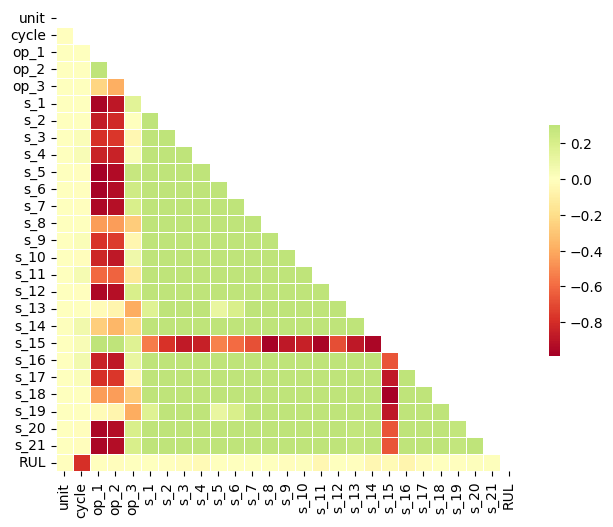

In [ ]:
corr = dataset_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap='RdYlGn', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Observation: NO clear correlation between sensors and RUL value.

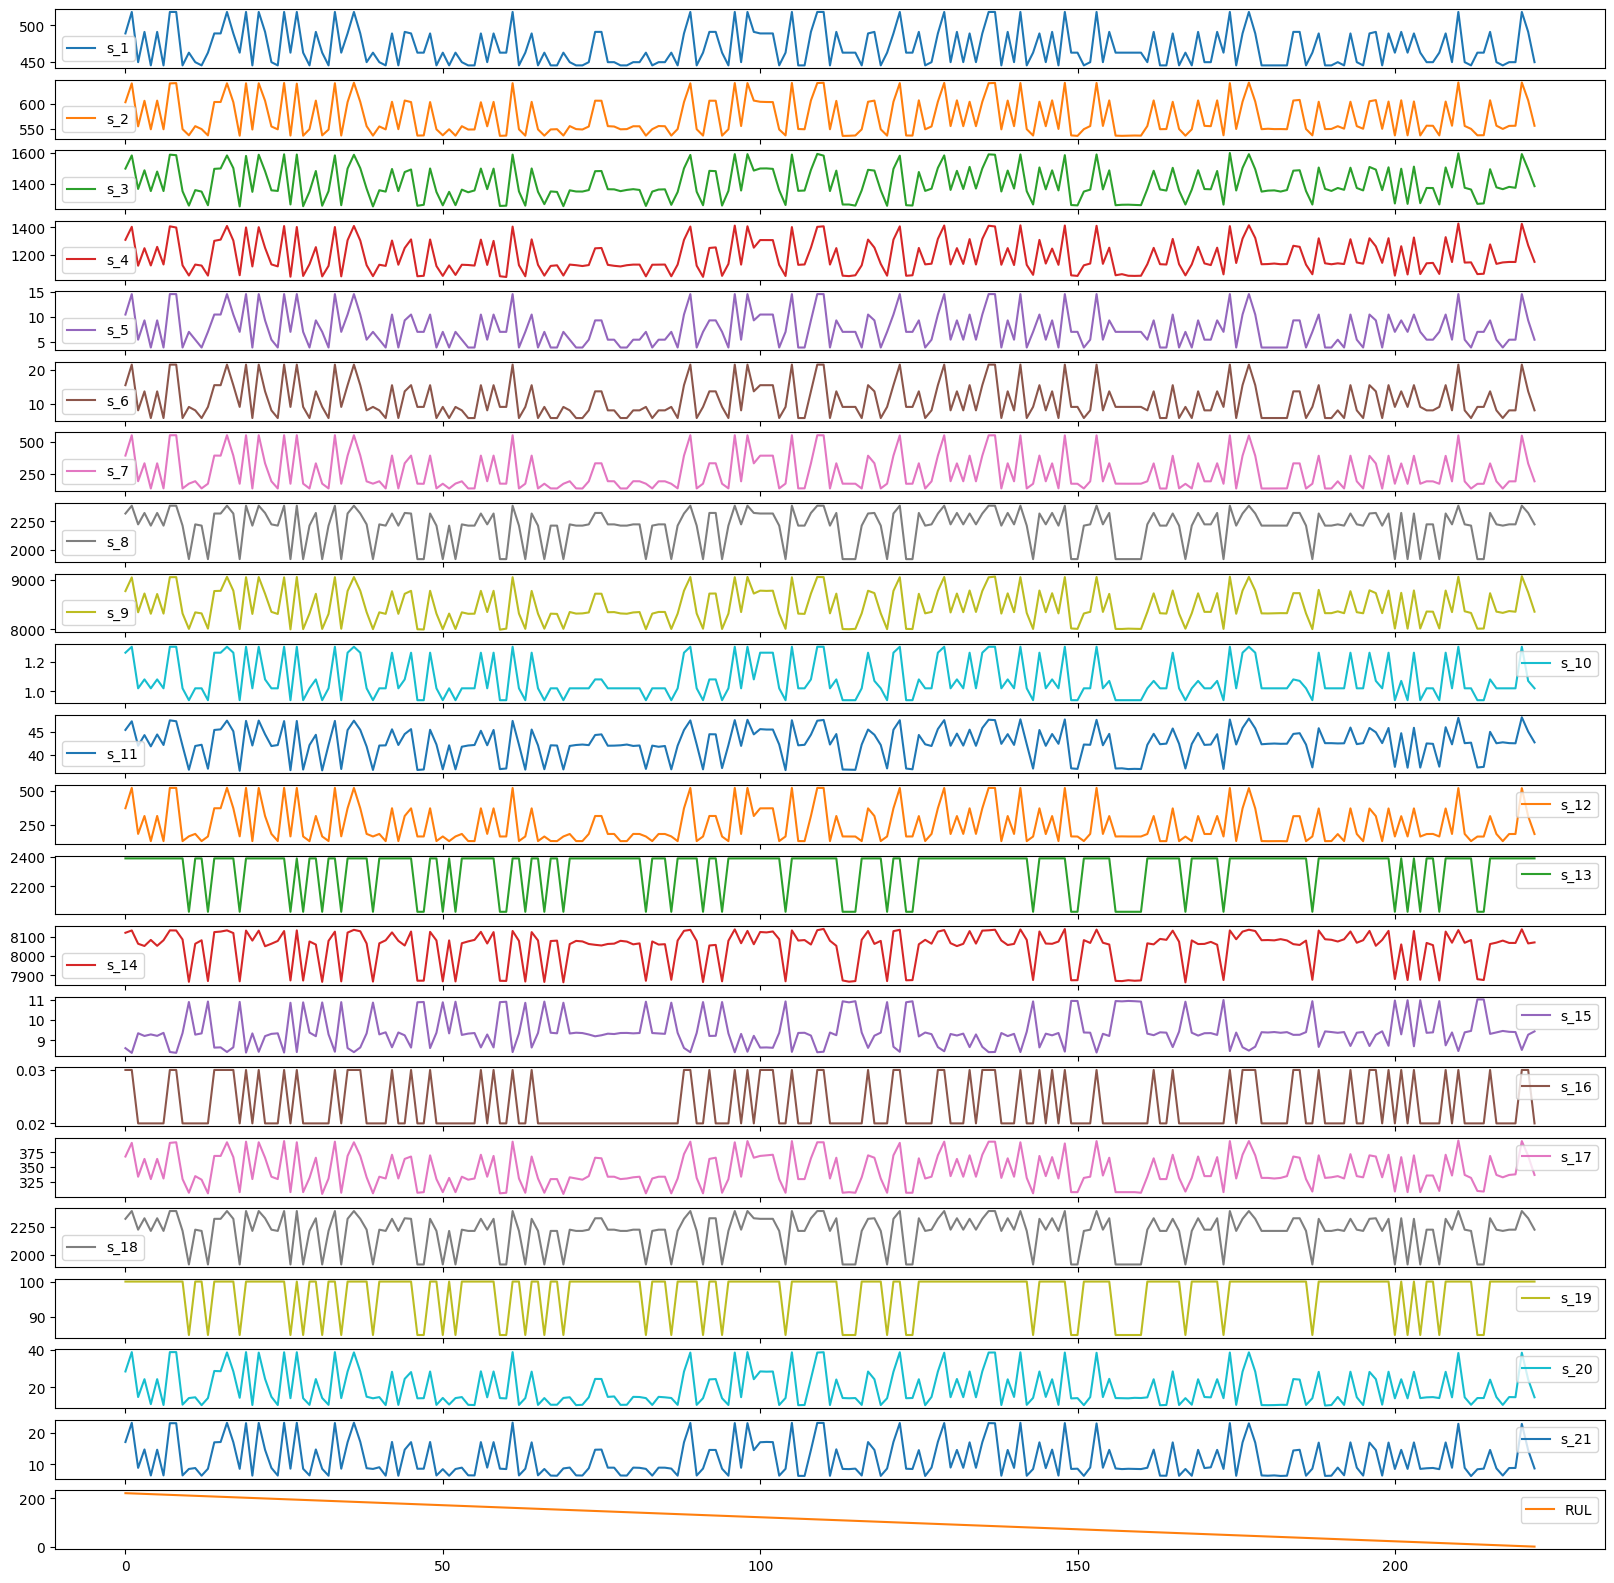

In [ ]:
# sensor data
engine_id1 = train_df[train_df['unit'] == 1]
engine_id1_sensors_df = engine_id1.loc[:,~train_df.columns.isin(['unit','op_1','op_2','op_3','cycle'])]
ax1 = engine_id1_sensors_df.plot(subplots=True, sharex=True, figsize=(20,20))

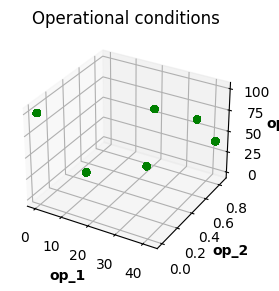

In [ ]:
# operating settings data
x = train_df['op_1'].to_numpy()
y = train_df['op_2'].to_numpy()
z = train_df['op_3'].to_numpy()

fig = plt.figure(figsize = (5, 3))
ax = plt.axes(projection ="3d")


ax.set_xlabel('op_1', fontweight ='bold')
ax.set_ylabel('op_2', fontweight ='bold')
ax.set_zlabel('op_3', fontweight ='bold')
ax.scatter3D(x, y, z, color = "green")
plt.title("Operational conditions")

plt.show()

Observations:
1. 3 Operating settings give rise to 6 clusters of data. This confirms that there are 6 operational modes.
2. The training data can therefore be partitioned by these 6 modes/ operating regimes. [3]

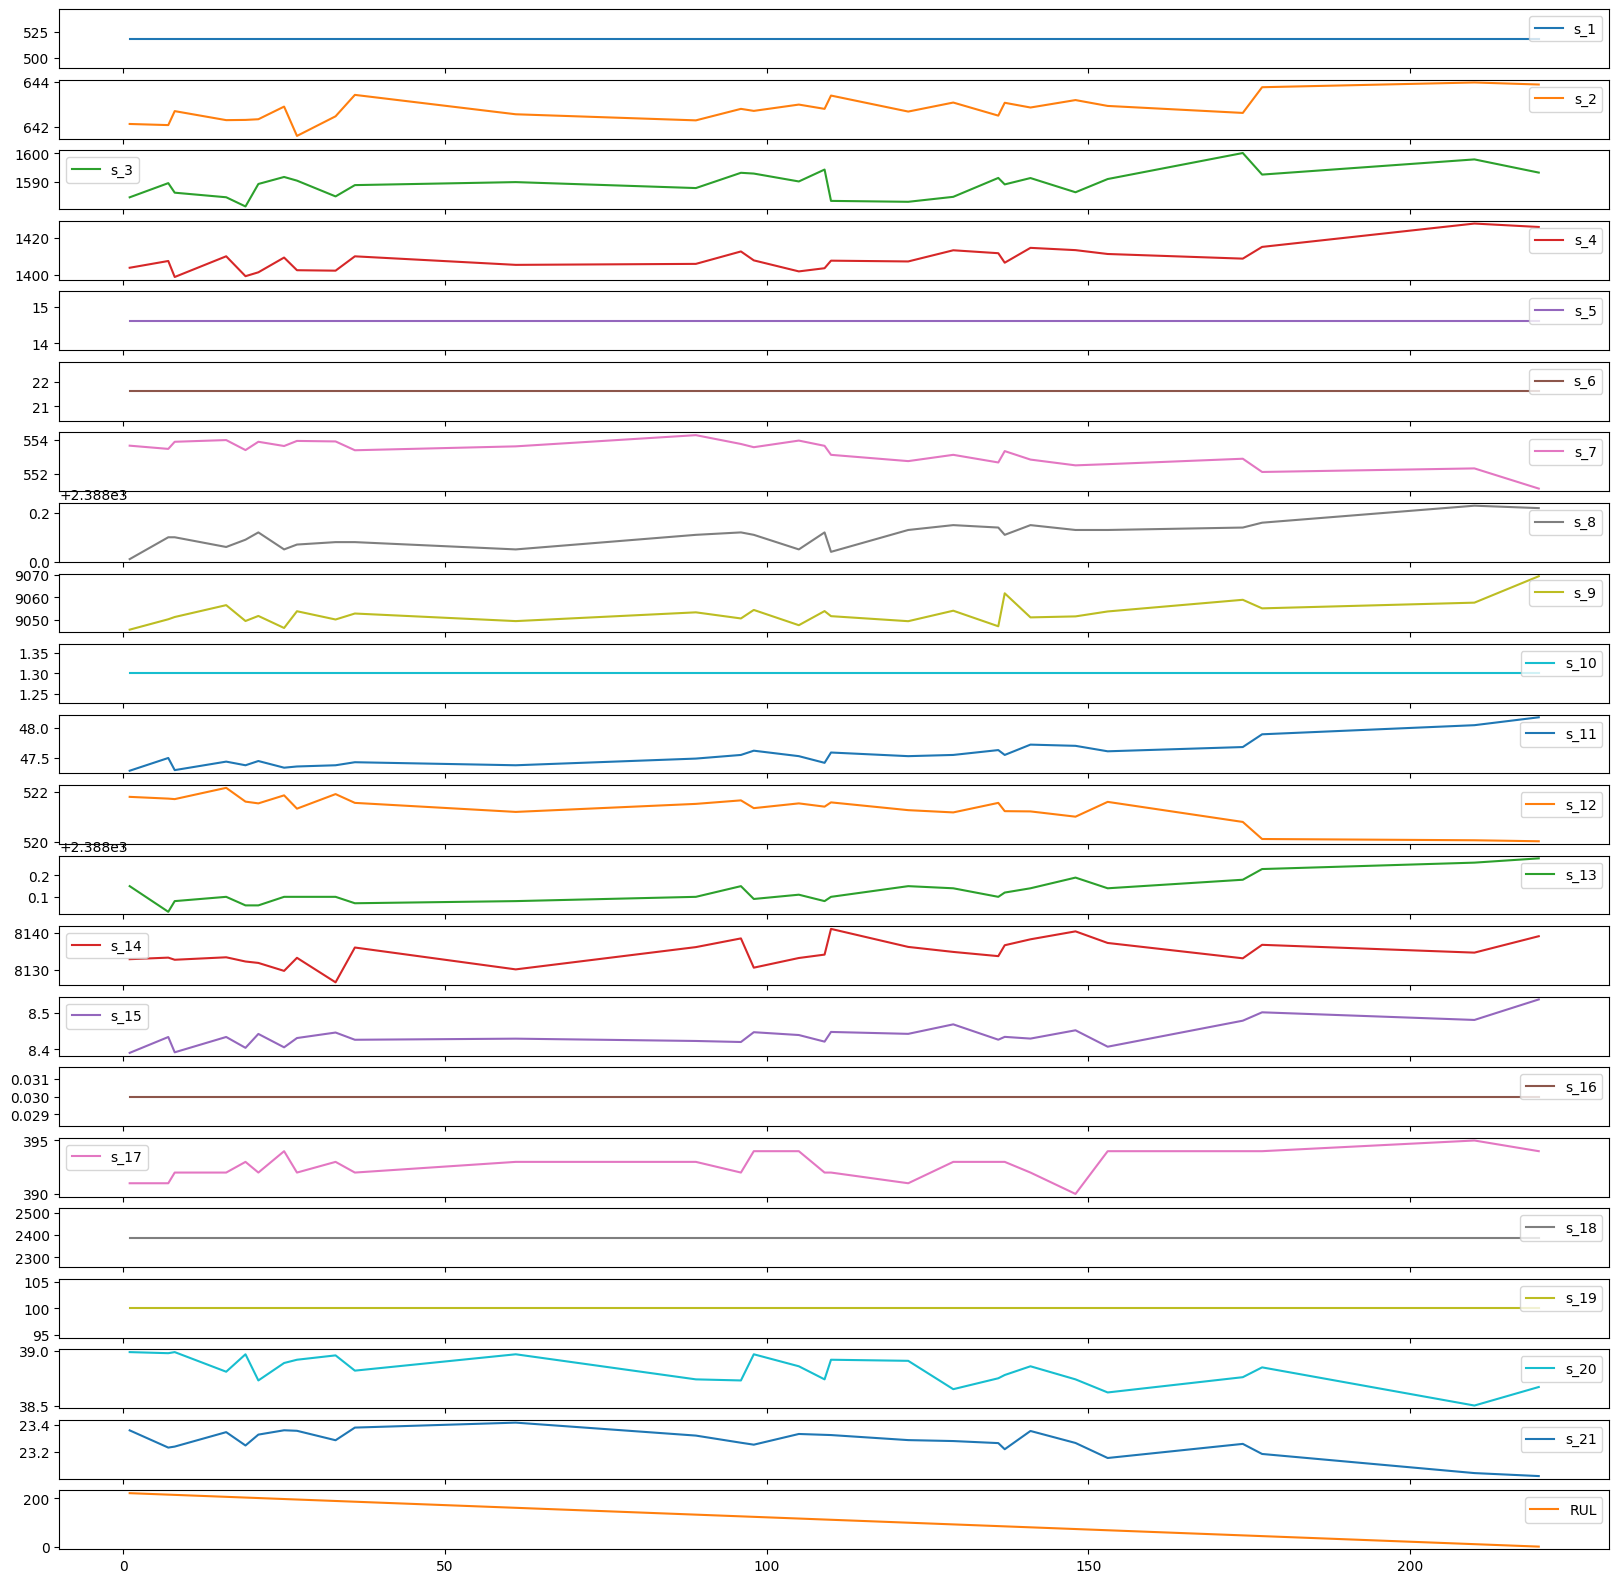

In [ ]:
# mode 1 sensors
mode1_cond1= train_df['op_1']<5
mode1_cond2 = train_df['op_2']<0.2
mode1_cond3 = train_df['op_3']>75
mode1_df = train_df[mode1_cond1 & mode1_cond2 & mode1_cond3]
engine_id1 = mode1_df[mode1_df['unit'] == 1]
engine_id1_sensors_df = engine_id1.loc[:,~mode1_df.columns.isin(['unit','op_1','op_2','op_3','cycle'])]
ax1 = engine_id1_sensors_df.plot(subplots=True, sharex=True, figsize=(20,20))

In [ ]:
# performing Kmeans for the 6 modes and the mode as a new feature.
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(train_df[['op_1','op_2','op_3']])
train_df.insert(loc = 5,
          column = 'mode',
          value = kmeans.labels_)
train_df.head()

val_kmeans = kmeans.predict(val_df[['op_1','op_2','op_3']])
val_df.insert(loc = 5,
          column = 'mode',
          value = val_kmeans)

,unit,cycle,op_1,op_2,op_3,mode,s_1,s_2,s_3,s_4,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,10.0047,0.2501,20.0,4,0.613566,0.658189,0.750498,0.875475,...,0.420784,0.652817,-0.946153,1.409393,0.710567,0.623395,0.420561,0.790251,0.794533,222
1,1,2,0.0015,0.0003,100.0,3,1.733912,1.674974,1.551246,1.662240,...,0.420940,0.794335,-1.253213,1.409393,1.537060,1.096673,0.420561,1.842088,1.836728,221
2,1,3,34.9986,0.8401,60.0,5,-0.884640,-0.645170,-0.484780,-0.693370,...,0.419385,-0.017041,0.030081,-0.709504,-0.511204,-0.035079,0.420561,-0.599062,-0.606311,220
3,1,4,20.0031,0.7005,0.0,1,0.694510,0.735785,0.646899,0.366893,...,0.420318,-0.152682,-0.146255,-0.709504,0.566830,0.657690,0.420561,0.369921,0.391980,219
4,1,5,42.0041,0.8405,40.0,2,-1.052579,-0.803039,-0.613596,-0.678055,...,0.418918,0.216040,-0.045853,-0.709504,-0.654942,-0.110530,0.420561,-0.987059,-1.019423,218


## Normalization

<ipython-input-58-7012b3c8bf57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.iloc[:,6:27]=(train_df.iloc[:,6:27]-train_mean)/train_std
<ipython-input-58-7012b3c8bf57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df.iloc[:,5:26]=(val_df.iloc[:,5:26]-train_mean)/train_std
<ipython-input-58-7012b3c8bf57>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

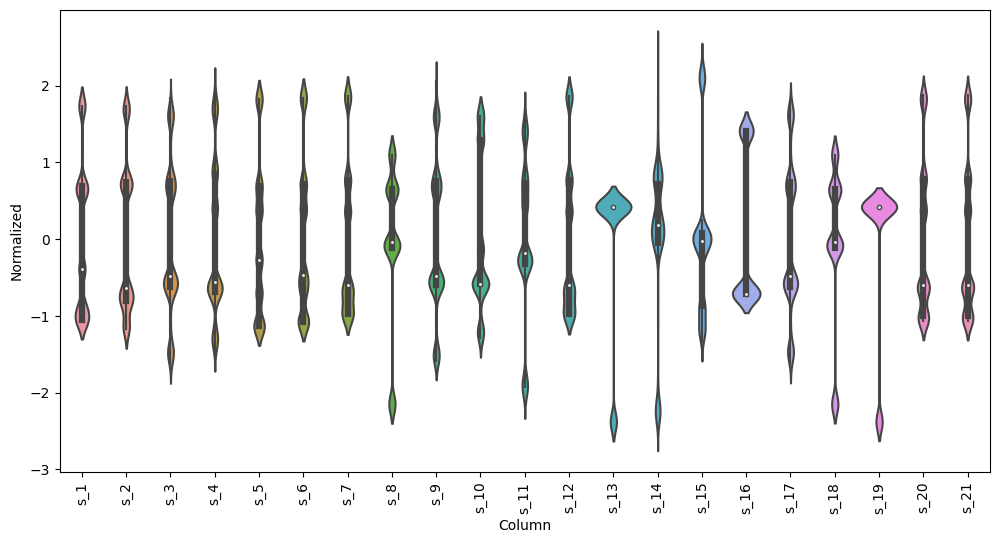

In [ ]:
# apply mean normalization on sensor data

train_mean = train_df.iloc[:,6:27].mean()
train_std = train_df.iloc[:,6:27].std()
train_df.iloc[:,6:27]=(train_df.iloc[:,6:27]-train_mean)/train_std
val_df.iloc[:,5:26]=(val_df.iloc[:,5:26]-train_mean)/train_std
test_df.iloc[:,5:26]=(test_df.iloc[:,5:26]-train_mean)/train_std

dataset_df_std = train_df.iloc[:,6:27]
dataset_df_std = dataset_df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=dataset_df_std)
_ = ax.set_xticklabels(dataset_df.iloc[:,5:26].keys(), rotation=90)

Observations: No long tails after normalization. Hence no outliers.

TODO:
1. Perform PCA on sensor data.




# Learning and Predicting

In [ ]:
X_train = train_df.iloc[:,1:27].to_numpy()
# X = train_df.iloc[:, ~train_df.columns.isin(['unit','op_1','op_2','RUL'])].to_numpy()
Y_train = train_df.iloc[:,27].to_numpy()
Y_train = np.ravel(Y_train)

X_val = val_df.iloc[:,1:27].to_numpy()
# X_val = np.ravel(X_val)
Y_val = val_df.iloc[:,27].to_numpy()
Y_val = np.ravel(Y_val)

## XGBoost Regression model

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.018, gamma=0, subsample=0.8,
                    colsample_bytree=0.5, max_depth=3,silent=True)

In [ ]:
xgb_model.fit(X_train,Y_train)

[10:37:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.018, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred_val_xgb = xgb_model.predict(X_val)

## MLP

In [ ]:
#source: https://www.tensorflow.org/tutorials/structured_data/time_series#single_step_models
#TODO
# MLP_model = keras.Sequential()
# MLP_model.add(Dense(25, activation='relu', input_shape=(25,)))
# MLP_model.add(BatchNormalization())
# MLP_model.add(Dense(32, activation='relu'))
# MLP_model.add(Dropout(0.3))
# MLP_model.add(Dense(1024, activation='relu'))
# MLP_model.add(Dropout(0.5))
# MLP_model.add(Dense(512, activation='relu'))
# MLP_model.add(Dense(64, activation='relu'))
# MLP_model.add(Dense(1))

# MLP_model = tf.keras.Sequential([
#     # Take the last time step.
#     # Shape [batch, time, features] => [batch, 1, features]
#     tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
#     # Shape => [batch, 1, dense_units]
#     tf.keras.layers.Dense(512, activation='relu'),
#     # Shape => [batch, out_steps*features]
#     tf.keras.layers.Dense(OUT_STEPS*num_features,
#                           kernel_initializer=tf.initializers.zeros()),
#     # Shape => [batch, out_steps, features]
#     tf.keras.layers.Reshape([OUT_STEPS, num_features])
# ])


In [ ]:
# initial_learning_rate = 0.1
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)
# optimizer_A=tf.keras.optimizers.Adam(learning_rate = 0.001)
# MLP_model.compile(optimizer=optimizer_A,loss='mean_absolute_error',metrics=['accuracy'])
# MLP_model.summary()

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=3, min_lr=1e-7, verbose=1)
# history = MLP_model.fit(x=X_train,y=Y_train,
#                     validation_data = (X_val,Y_val),
#                     epochs = 50,
#                     shuffle = True,
#                     callbacks=[reduce_lr])

# Performance Evaluation
We will be following the scoring metric given by NASA challenge


In [ ]:
#Error Function for Competitive Data
#source: https://www.kaggle.com/code/vinayak123tyagi/damage-propagation-modeling-for-aircraft-engine
def score(y_true,y_pred,a1=10,a2=13):
    score = 0
    d = y_pred - y_true
    for i in d:
        if i >= 0 :
            score += math.exp(i/a2) - 1
        else:
            score += math.exp(- i/a1) - 1
    return score
def score_func(y_true,y_pred):
    lst = [round(score(y_true,y_pred),2),
          round(mean_absolute_error(y_true,y_pred),2),
          round(mean_squared_error(y_true,y_pred),2)**0.5,
          round(r2_score(y_true,y_pred),2)]

    print(f' competitive score {lst[0]}')
    print(f' mean absolute error {lst[1]}')
    print(f' root mean squared error {lst[2]}')
    print(f' R2 score {lst[3]}')
    return [lst[1], round(lst[2],2), lst[3]*100]

def plot_result(y_true,y_pred):
    rcParams['figure.figsize'] = 12,5
    plt.plot(y_pred)
    plt.plot(y_true)
    plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
    plt.ylabel('RUL')
    plt.xlabel('training samples')
    plt.legend(('Predicted', 'True'), loc='upper right')
    plt.title('COMPARISION OF Real and Predicted values')
    plt.show()
    return

## XGBoost Regression model

In [ ]:
XGB_individual_scorelst = score_func(Y_val,pred_val_xgb)

 competitive score 1054983.68
 mean absolute error 22.51
 root mean squared error 29.9127063302537
 R2 score 0.8


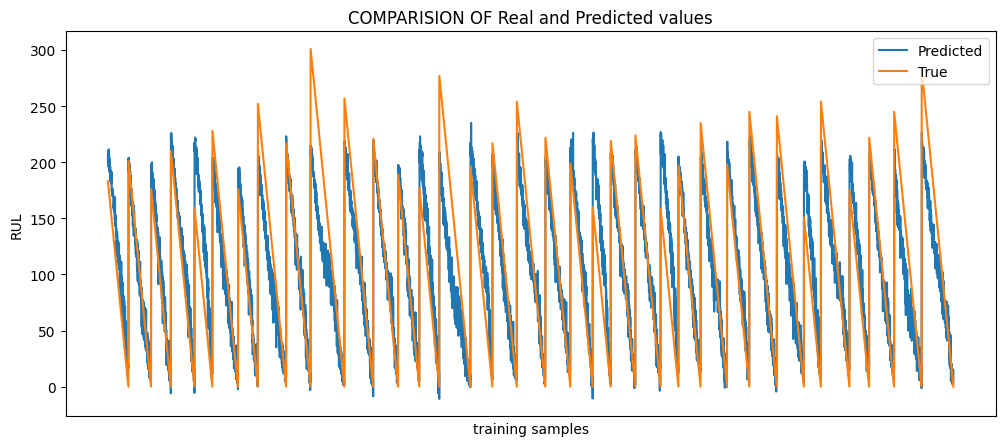

In [ ]:
plot_result(Y_val,pred_val_xgb)

## MLP

In [ ]:
#TODO
# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# epochs = range(1,51)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss for Adam')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# References  
[1] Saxena A, Goebel K, Simon D, Eklund N. Damage propagation modeling for aircraft engine run-to-failure simulation. In2008 international conference on prognostics and health management 2008 Oct 6 (pp. 1-9). IEEE.  
[2] Ramasso E, Saxena A. Review and analysis of algorithmic approaches developed for prognostics on CMAPSS dataset. InAnnual Conference of the Prognostics and Health Management Society 2014. 2014 Sep 29.  
[3] Peel L. Data driven prognostics using a Kalman filter ensemble of neural network models. In2008 international conference on prognostics and health management 2008 Oct 6 (pp. 1-6). IEEE.  
[4] Wang T, Yu J, Siegel D, Lee J. A similarity-based prognostics approach for remaining useful life estimation of engineered systems. In2008 international conference on prognostics and health management 2008 Oct 6 (pp. 1-6). IEEE.